# H.KianAra

# ورود کتابخانه ها

In [ ]:
import numpy as np
from numpy import array
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# ورود داده ها

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DataSets/HaKeshti.csv')
df

,OPEN,CLOSE,HIGHT,LOW,VOL,CHANGE
0,4107,4312,4312,4312,68196719,0.05
1,4312,4527,4527,4527,73819075,0.05
2,4527,4753,4753,4753,6902714,0.05
3,4753,5059,5230,4967,114149259,0.06
4,5059,5279,5290,5211,6174928,0.04
...,...,...,...,...,...,...
385,26741,28078,28078,28078,3916512,0.05
386,28078,29481,29481,29481,14434093,0.05
387,29481,30581,30955,28115,80363144,0.04
388,23492,27403,27804,26480,37640401,0.17


# نمودار قیمت باز شدن سهم

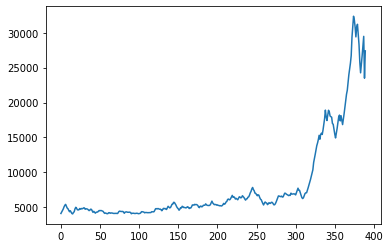

In [ ]:
df['OPEN'].plot.line()

# استاندارد سازی

In [ ]:
df_train = df[:370]
df_test = df[370:]

df_train_scaled = StandardScaler().fit_transform(df_train)
df_test_scaled = StandardScaler().fit_transform(df_test)

# makes time serize 

In [ ]:
X = []
y = []
n_steps = 6
n_future = 1

for i in range (n_steps, len(df_train_scaled) - n_future + 1):
  X.append(df_train_scaled[i - n_steps:i])
  y.append(df_train_scaled[i + n_future - 1:i + n_future, 0])

X, y = array(X), array(y)
print('X shape : ', X.shape)
print('y shape : ', y.shape)

X shape :  (364, 6, 6)
y shape :  (364, 1)


# LSTM Model

In [ ]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(20, activation='relu'))
model.add(Dense(y.shape[1]))

In [ ]:
model.compile(optimizer='adam', loss='mse')
model.summary()
h = model.fit(X, y, epochs=64, batch_size=16, validation_split=0.1, verbose=0)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 6, 64)             18176     
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 20)                660       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 21        
Total params: 31,273
Trainable params: 31,273
Non-trainable params: 0
_________________________________________________________________


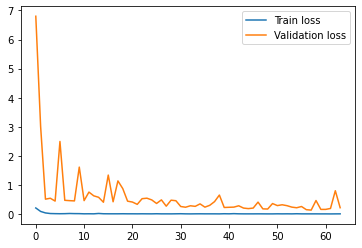

In [ ]:
plt.plot(h.history['loss'], label='Train loss')
plt.plot(h.history['val_loss'], label='Validation loss')
plt.legend()

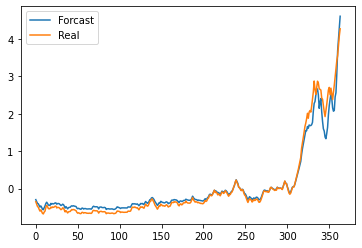

In [ ]:
forcast = model.predict(X)
plt.plot(forcast, label='Forcast')
plt.plot(y, label='Real')
plt.legend()

# Predict

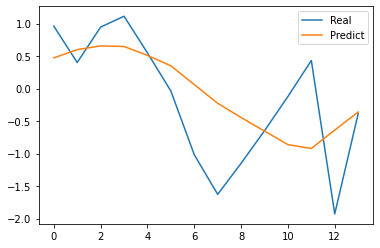

In [ ]:
Xpred = []

for i in range (n_steps, len(df_test_scaled) - n_future + 1):
  Xpred.append(df_test_scaled[i - n_steps:i])

Xpred = array(Xpred)
pred = model.predict(Xpred)

plt.plot(df_test_scaled[n_steps:, 0], label='Real')
plt.plot(pred, label='Predict')
plt.legend()